[1.99104419e-21 3.58987400e-21 2.81142702e-21 2.10202487e-21
 1.57921717e-21 1.06822444e-21 6.55120778e-22 4.20088265e-22]
[8.21917808e+14 6.74157303e+14 5.44464610e+14 4.55927052e+14
 3.72208437e+14 2.45901639e+14 1.84049080e+14 1.36986301e+14]
[4.48349226 5.43851635 2.77808079 1.45648936 0.72927786 0.21530995
 0.07397201 0.02627687]
[4.96098760e+07 6.39462653e+08 4.94381235e+09 1.70533157e+10
 4.61509707e+10 1.20806082e+11 1.26449376e+11 9.17414208e+10]
[4.96098760e+07 6.39462653e+08 4.94381235e+09 1.70533157e+10
 4.61509707e+10 1.20806082e+11 1.26449376e+11 9.17414208e+10]
[4.96098760e+07 6.39462653e+08 4.94381235e+09 1.70533157e+10
 4.61509707e+10 1.20806082e+11 1.26449376e+11 9.17414208e+10]
[4.96098905e+07 6.39462807e+08 4.94381331e+09 1.70533185e+10
 4.61509768e+10 1.20806092e+11 1.26449384e+11 9.17414255e+10]
[4.96098767e+07 6.39462662e+08 4.94381242e+09 1.70533160e+10
 4.61509714e+10 1.20806083e+11 1.26449378e+11 9.17414222e+10]
[-2.01009010e-01 -2.59097110e+00 -2.00313104e+01

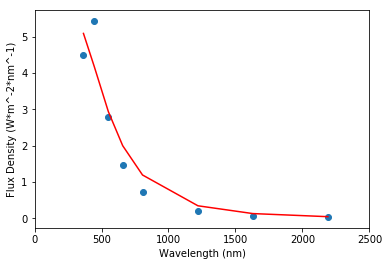

In [28]:
 
 
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
 
 
#create variables needed
h = 6.626e-34 #Planck's Constant
c = 3.0e+8 #Speed of light
k = 1.38e-23 #Boltzman's Constant
#Apparent magnitudes of Alcyone
m = np.array([2.44,2.78,2.87,2.84,2.88,2.94,2.97,2.94])

#Effective wavelength
lam = np.array([365,445,551,658,806,1220,1630,2190]) * 1e-9
 
#Zeropoint values
f0_jy = np.array([1884,4646,3953,2875,2241,1602,1010,630]) * 1e-23
 
#calculate flux density
fv = f0_jy * (10**(-m/2.5))
print(fv)
 
#calculate frequency from eff wavelength
freq = c / lam
print(freq)
 
#calculate flam
flam = (fv * freq)/ lam
print(flam)
 
#create planck function
def planck(wave, T, n):
    bb = n*(2.0*h*c**2)/ ( (wave**5) * (np.exp(h*c/(wave*k*T)) - 1.0) )
    print(bb)
    return bb
    
#enter parameters for plack function
params, params_covariance = curve_fit(planck, lam, flam, p0=[2000,1])
perr = np.sqrt(np.diag(params_covariance))
 
#create plot diagram
plt.scatter(lam*1e9,flam)
plt.plot(lam*1e9, planck(lam, params[0], params[1]), color='red')
plt.xlim(0,2500)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Flux Density (W*m^-2*nm^-1)')
 
#print planck function parameters
print(params)
print(perr)